In [27]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

In [74]:
#######################
## HELPER FUNCTIONS  ##
#######################

# Finds the outer product of g and f transpose
def outer_product(f, g, n):
    # initialize a matrix of given dimensions
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i][j] = g[j] * f[i]
    return A

# Generates n random vector pairs with dimensionality dim
def generate_vector_pairs(n, dim):
    F = []
    G = []
    for _ in range(n):
        f = np.random.rand(dim,1)
        g = np.random.rand(dim,1)
        # centered
        f = f - f.mean()
        g = g - g.mean()
        # scaled
        f = f / np.linalg.norm(f)
        g = g / np.linalg.norm(g)
        if n == 1:
            return f,g
        else:
            F.append(f)
            G.append(g)
    return F,G

# Multiplies a scalar and vectors
def scalar_times_vector(scalar, a, dim):
    B = np.zeros(dim)
    for i in range(dim):
        B[i] = scalar * a[i]
    return B

# Widrow Hoff learning rule 
def Widrow_Hoff(k, g, g_prime, f, dim):
    length_f = np.linalg.norm(f)
    difference_vector = np.subtract(g, g_prime)
    #weighted_vector = scalar_times_vector(k, difference_vector,dim)
    weighted_vector = k * difference_vector
    deltaA = outer_product(f,weighted_vector, dim)
    return deltaA, weighted_vector
    

In [71]:
dim = 100
n = 25 # iterations

In [75]:
# F and G are column vectors
F_set, G_set = generate_vector_pairs(n, dim)
A_i = [ outer_product(F_set[i], G_set[i], dim) for i in range(n) ]
# Form the overall connectivity matrix A
A = np.zeros((dim,dim))
for i in range(n):
    A = np.add(A, A_i[i])

# Compute the output for each stored vector fi
G_prime = [ A.dot(F_set[i]) for i in range(n) ]
dot_products = [ np.sum(G_prime[i] * G_set[i]) for i in range(n) ]
#print("Mean and St. Dev of Dot Products: ", round(np.mean(dot_products),6), round(np.std(dot_products),6))

learned = np.zeros(n)
count = 1
converged = False
oscillate_input = False
errorThreshold = 0.000001;
Errors = []
k = 0.85

while converged == False:
    mse = 0
    # Pick a random pair of f and g vectors
    x = np.random.randint(low=0, high=n)
    if x > n:
        x = 1
    f = F_set[x]
    g = G_set[x]
    
    g_prime = A.dot(f)
    #g_prime = G_prime[x]
    
    learned[x] = 1

    #k = 1/(f*f)
    k = k - .05
    deltaA, error = Widrow_Hoff(k, g, g_prime, f, dim)
    
    error_length = np.linalg.norm(error)
    Errors.append(error_length)
    #print(avg_error)
    
    #print("Current Error:", (np.linalg.norm(error) - new_error)/np.linalg.norm(error))
    print("Current Error:", error_length)
    
    #if (abs(np.linalg.norm(error) - new_error) / np.linalg.norm(error) < errorThreshold) and (sum(learned) == n):
    if (abs(error_length) < errorThreshold) :
        print("Error: ", abs(np.linalg.norm(error) - new_error) / np.linalg.norm(error))
        print("Error Threshold: ", errorThreshold)
        print("Number of trials: ", n)
        converged = True
        
    
    A = np.add(A, deltaA)
    count = count + 1;
    x = x + 1;
    


Current Error: 0.9451249638935263
Current Error: 0.8622687572137911
Current Error: 0.9432664268773389
Current Error: 0.7542344668447327
Current Error: 0.6639417525562152
Current Error: 0.90669242606459
Current Error: 0.5879569740832535
Current Error: 0.5488894282874608
Current Error: 0.4506786472518374
Current Error: 0.4048817637690125
Current Error: 0.3469149791849155
Current Error: 0.31750465589707705
Current Error: 0.27460726253881246
Current Error: 0.19100719509098218
Current Error: 0.14302374428034115
Current Error: 0.07088717873764894
Current Error: 2.67947727142932e-16
Error:  1.0
Error Threshold:  1e-06
Number of trials:  25


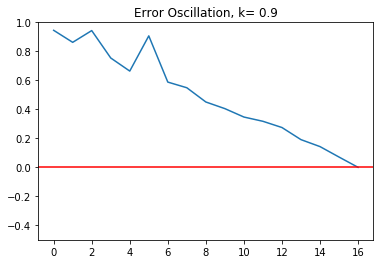

In [76]:
plt.plot(Errors,'-')
plt.ylim(-0.5,1)
plt.axhline(y=0,color="red")
plt.title("Error Oscillation, k= 0.9")
plt.show()

In [ ]:
# See what happens when you use different k values

In [ ]:
# How long does it take to converge ??
# take the sum squared of the errors : error vector squared, then sum it
# set a tolerance
# if hit tolerance a certain number of times, done

In [ ]:
# How many associations can be stored before the system starts to break down